## Import Necessary Libraries

In [ ]:
# !pip install -U -q PyDrive

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn

## Reading of dataset

The relevant data is obtained from: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023/data

In [ ]:
# Google Colab Method
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1IREhjzulC1n22Imk2ECAcvbDAH6mvQpU'  # replace with file ID
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Global_YouTube_Statistics.csv')

data_df = pd.read_csv('Global_YouTube_Statistics.csv', encoding='ISO-8859-1')

data_df

# If reading from local Jupyter, ensure that the file is in the same folder.
# data_df = pd.read_csv('Global_YouTube_Statistics.csv', encoding='ISO-8859-1')
# data_df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


## Column Description (Data Dictionary)

| Column Name                               | Description |
|-------------------------------------------|-------------|
| rank                                      | Position of the YouTube channel based on the number of subscribers |
| Youtuber                                  | Name of the YouTube channel |
| subscribers                               | Number of subscribers to the channel |
| video views                               | Number of total views to the channel |
| category                                  | Category or niche of the channel |
| Title                                     | Title of the YouTube channel |
| uploads                                   | Total number of videos uploaded on the channel |
| Country                                   | Country where the YouTube channel originates |
| Abbreviation                              | Abbreviation of the country |
| channel_type                              | Type of the YouTube channel (e.g., individual, brand) |
| video_views_rank                          | Ranking of the channel based on total video views |
| country_rank                              | Ranking of the channel based on the number of subscribers within its country |
| channel_type_rank                         | Ranking of the channel based on its type (individual or brand) |
| video_views_for_the_last_30_days          | Total video views in the last 30 days |
| lowest_monthly_earnings                   | Lowest estimated monthly earnings from the channel (`$`) |
| highest_monthly_earnings                  | Highest estimated monthly earnings from the channel (`$`) |
| lowest_yearly_earnings                    | Lowest estimated yearly earnings from the channel (`$`) |
| highest_yearly_earnings                   | Highest estimated yearly earnings from the channel (`$`) |
| subscribers_for_last_30_days              | Number of new subscribers gained in the last 30 days |
| created_year                              | Year when the YouTube channel was created |
| created_month                             | Month when the YouTube channel was created |
| created_date                              | Exact date of the YouTube channel's creation |
| Gross tertiary education enrollment (%)   | Percentage of the population enrolled in tertiary education in the country (%) |
| Population                                | Total population of the country |
| Unemployment rate                         | Unemployment rate in the country (%) |
| Urban_population                          | Percentage of the population living in urban areas (%) |
| Latitude                                  | Latitude coordinate of the country's location |
| Longitude                                 | Longitude coordinate of the country's location |


## Perform Data Exploration and Pre-processing

In [ ]:
# Checking null values
data_df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [ ]:
# data_df.isnull().sum()

# Fill in null values with "Others" for categorical variables
data_df['category'] = data_df['category'].fillna('Others')
data_df['Country'] = data_df['Country'].fillna('Others')
data_df['Abbreviation'] = data_df['Abbreviation'].fillna('OTHERS')
data_df['channel_type'] = data_df['channel_type'].fillna('Others')


# Fill null with the mean for below numerical variables
data_df['video_views_rank'] = data_df['video_views_rank'].fillna(data_df['video_views_rank'].mean())
data_df['country_rank'] = data_df['country_rank'].fillna(data_df['country_rank'].mean())
data_df['channel_type_rank'] = data_df['channel_type_rank'].fillna(data_df['channel_type_rank'].mean())
data_df['video_views_for_the_last_30_days'] = data_df['video_views_for_the_last_30_days'].fillna(data_df['video_views_for_the_last_30_days'].mean())
data_df['subscribers_for_last_30_days'] = data_df['subscribers_for_last_30_days'].fillna(data_df['subscribers_for_last_30_days'].mean())
data_df['Gross tertiary education enrollment (%)'] = data_df['Gross tertiary education enrollment (%)'].fillna(data_df['Gross tertiary education enrollment (%)'].mean())

# Fill null with 0 for the below numerical variables
data_df['Population'] = data_df['Population'].fillna(0)
data_df['Urban_population'] = data_df['Urban_population'].fillna(0)
data_df['Unemployment rate'] = data_df['Urban_population'].fillna(0)
data_df['Latitude'] = data_df['Latitude'].fillna(0)
data_df['Longitude'] = data_df['Longitude'].fillna(0)

# For missing dates, put 1990-01-01
data_df['created_year'] = data_df['created_year'].fillna(1990)
data_df['created_month'] = data_df['created_month'].fillna(1)
data_df['created_date'] = data_df['created_date'].fillna(1)


In [ ]:
data_df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

In [ ]:
data_df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.950000e+02,995.000000,995.000000,9.950000e+02,995.000000,9.950000e+02,...,9.950000e+02,9.950000e+02,995.000000,995.000000,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,995.000000,995.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.516583,15.672362,63.627752,3.771836e+08,1.964980e+08,1.964980e+08,23.340489,-12.381652
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362097e+06,1158.113278,1911.838101,4.044792e+08,71858.724092,1.148622e+06,...,1.379704e+07,4.994698e+05,4.777386,8.817350,24.438305,4.647169e+08,1.625394e+08,1.625394e+08,21.150562,79.479723
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,0.000000e+00,0.000000e+00,0.000000e+00,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.240000e+02,14.000000,28.000000,2.232300e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,40.200000,5.033944e+07,4.082730e+07,4.082730e+07,4.570868,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.180000e+02,75.000000,70.000000,7.406200e+07,13300.000000,2.127000e+05,...,2.600000e+06,3.490791e+05,2013.000000,16.000000,63.627752,2.702039e+08,1.832416e+08,1.832416e+08,23.634501,-3.435973
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.617500e+03,156.000000,145.000000,1.756103e+08,37900.000000,6.068000e+05,...,7.300000e+06,3.490791e+05,2016.000000,23.000000,88.200000,3.282395e+08,2.706630e+08,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,8.429340e+08,8.429340e+08,61.924110,138.252924


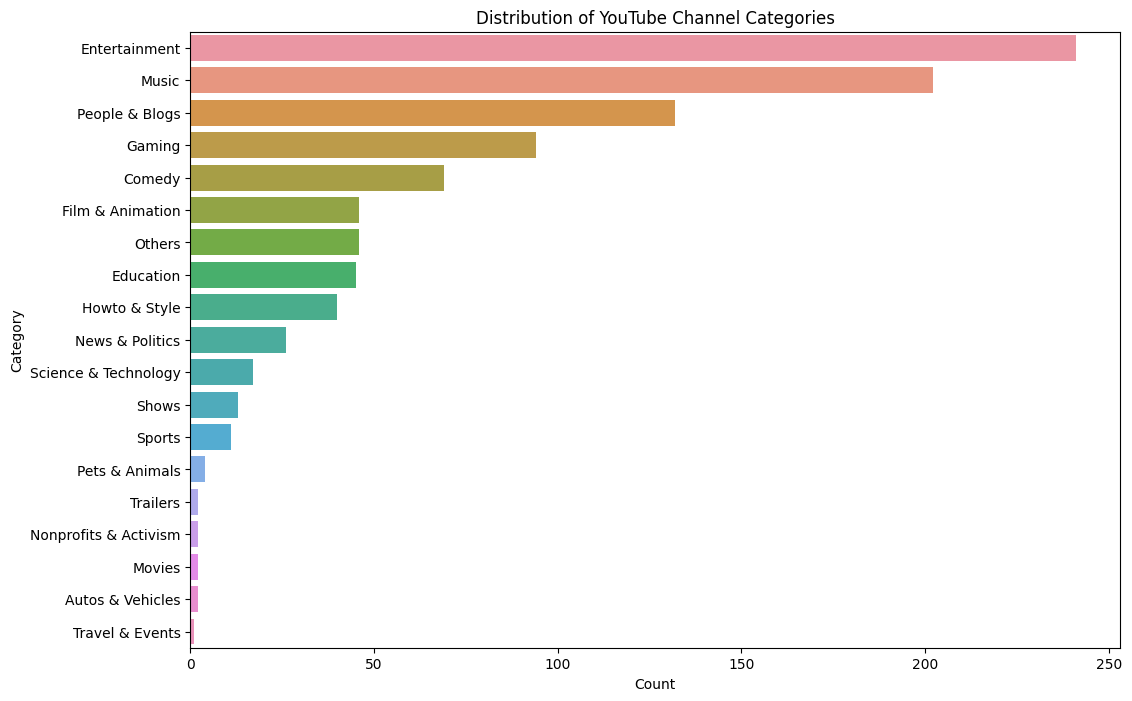

Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
Others                    46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: category, dtype: int64

In [ ]:
# Bar Chart for 'category'
plt.figure(figsize=(12, 8))
category_counts = data_df['category'].value_counts()
sns.barplot(x=category_counts, y=category_counts.index)
plt.title('Distribution of YouTube Channel Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

data_df['category'].value_counts()

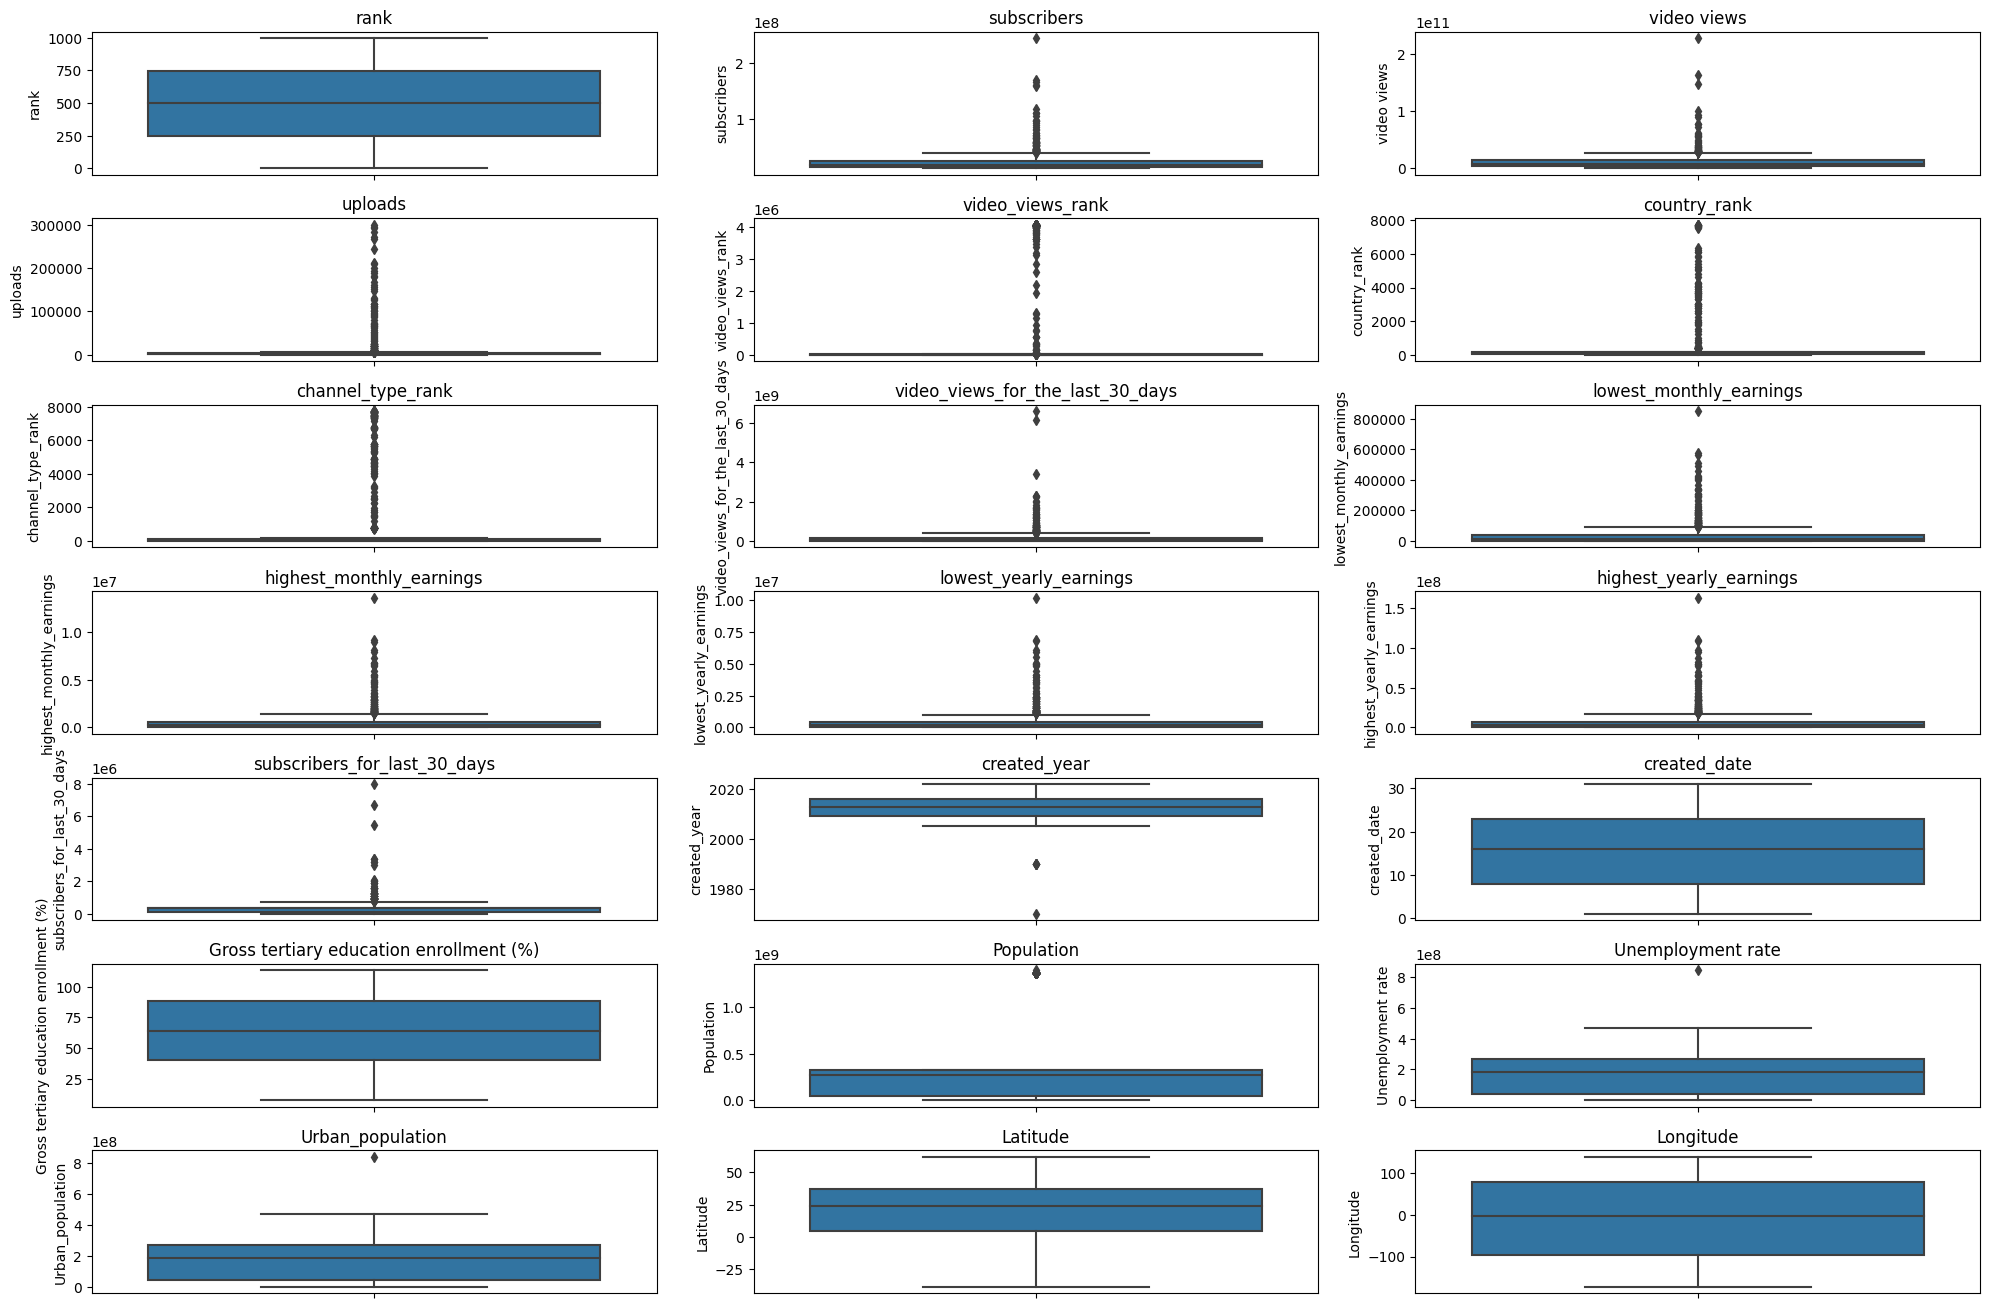

In [ ]:
# Selecting only numerical or float columns for the boxplot
numerical_columns = data_df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y = data_df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

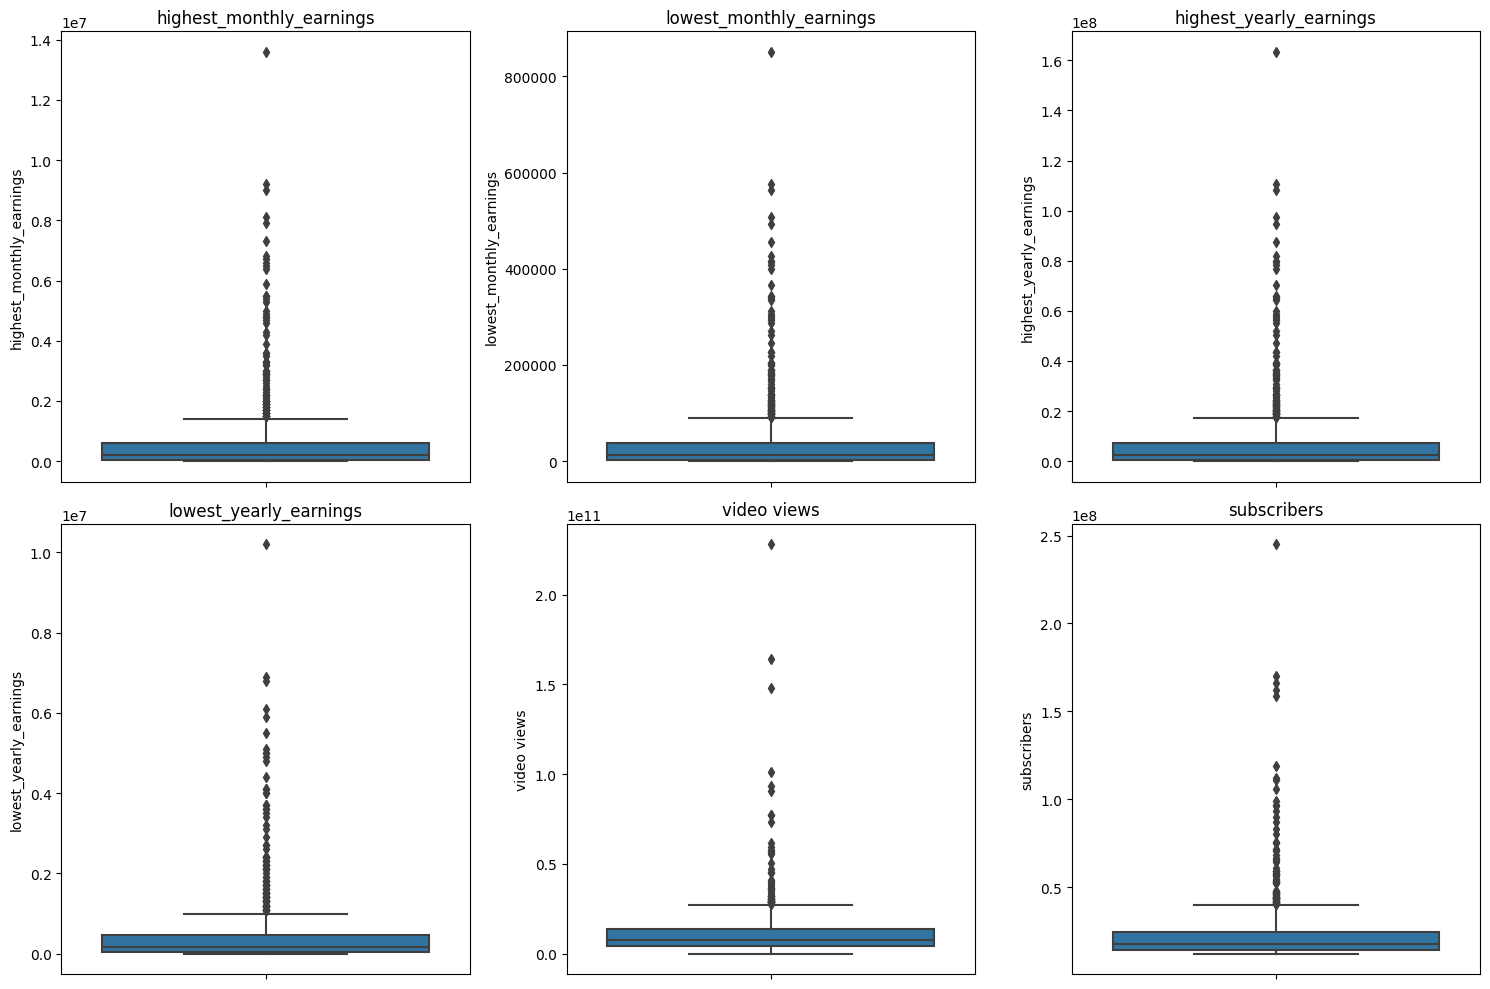

In [ ]:
# Box Plot for selected numerical columns:
  # 1. Highest Monthly Earnings
  # 2. Lowest Monthly Earnings
  # 3. Highest Yearly Earnings
  # 4. Lowest Yearly Earnings
  # 5. Video Views
  # 6. Subscribers

plt.figure(figsize=(15, 10))

# Selecting specified columns for box plot
columns_for_boxplot = [
    'highest_monthly_earnings', 'lowest_monthly_earnings',
    'highest_yearly_earnings', 'lowest_yearly_earnings',
    'video views', 'subscribers'
]

for i, column in enumerate(columns_for_boxplot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


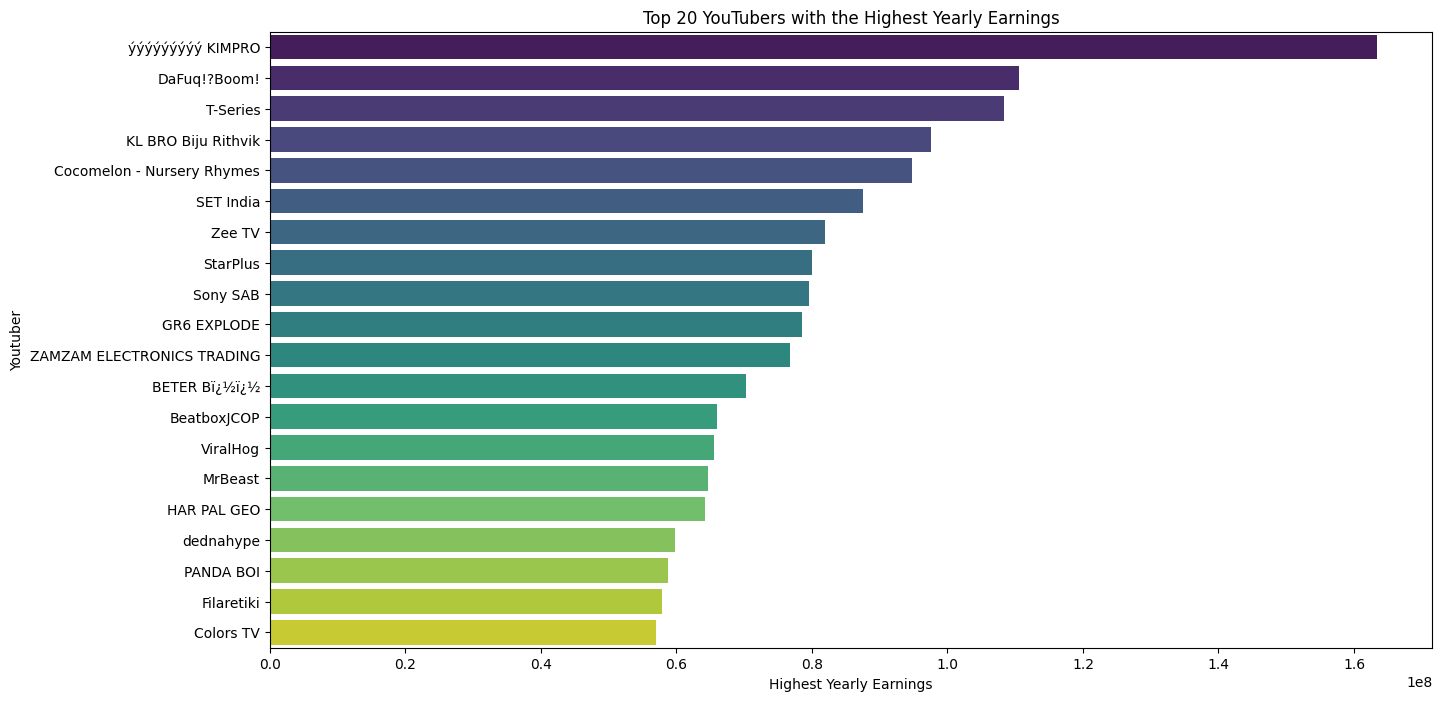

                       Youtuber  highest_yearly_earnings          category
495            ýýýýýýýýý KIMPRO              163400000.0            Others
417                DaFuq!?Boom!              110600000.0  Film & Animation
0                      T-Series              108400000.0             Music
302         KL BRO Biju Rithvik               97600000.0     Entertainment
3    Cocomelon - Nursery Rhymes               94800000.0         Education
4                     SET India               87500000.0             Shows
21                       Zee TV               81900000.0     Entertainment
139                    StarPlus               80000000.0     Entertainment
15                     Sony SAB               79600000.0             Shows
83                  GR6 EXPLODE               78500000.0             Music
332  ZAMZAM ELECTRONICS TRADING               76700000.0            Others
132               BETER Bï¿½ï¿½               70200000.0            Others
483                 Beatb

In [ ]:
# Sort the data by 'highest_yearly_earnings' and take the top 20 entries for the bar chart
top_earners = data_df.nlargest(20, 'highest_yearly_earnings')

# Plotting the bar chart for the top 20 YouTubers with the highest yearly earnings
plt.figure(figsize=(15, 8))
sns.barplot(x='highest_yearly_earnings', y='Youtuber', data=top_earners, palette='viridis')
plt.title('Top 20 YouTubers with the Highest Yearly Earnings')
plt.xlabel('Highest Yearly Earnings')
plt.ylabel('Youtuber')
plt.show()

# Select only the 'Youtuber' and 'highest_yearly_earnings' columns to display
top_20_youtubers_earnings = top_earners[['Youtuber', 'highest_yearly_earnings', 'category']]
category_counts = top_20_youtubers_earnings['category'].value_counts()
print(top_20_youtubers_earnings)
print(category_counts)


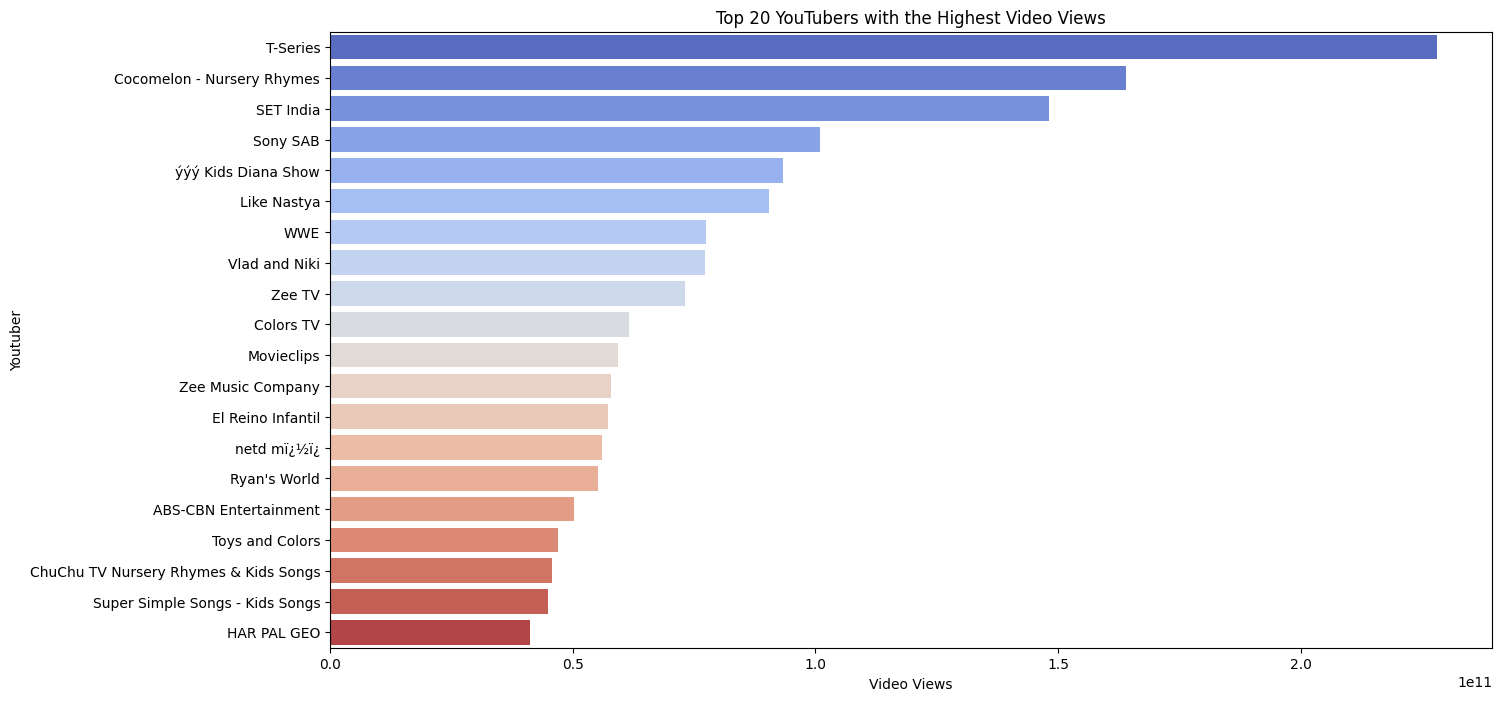

,Youtuber,video views
0,T-Series,2.280000e+11
3,Cocomelon - Nursery Rhymes,1.640000e+11
4,SET India,1.480000e+11
15,Sony SAB,1.010000e+11
6,ýýý Kids Diana Show,9.324704e+10
8,Like Nastya,9.047906e+10
11,WWE,7.742847e+10
9,Vlad and Niki,7.718017e+10
21,Zee TV,7.313905e+10
26,Colors TV,6.151091e+10


In [ ]:
# Sorting the data by 'video views' to get the top 20 YouTubers with the highest views
top_views = data_df.nlargest(20, 'video views')

# Plotting the bar chart for the top 20 YouTubers with the highest video views
plt.figure(figsize=(15, 8))
sns.barplot(x='video views', y='Youtuber', data=top_views, palette='coolwarm')
plt.title('Top 20 YouTubers with the Highest Video Views')
plt.xlabel('Video Views')
plt.ylabel('Youtuber')
plt.show()

# Viewing top 20 video views
top_20_views = top_views[['Youtuber', 'video views']]
top_20_views

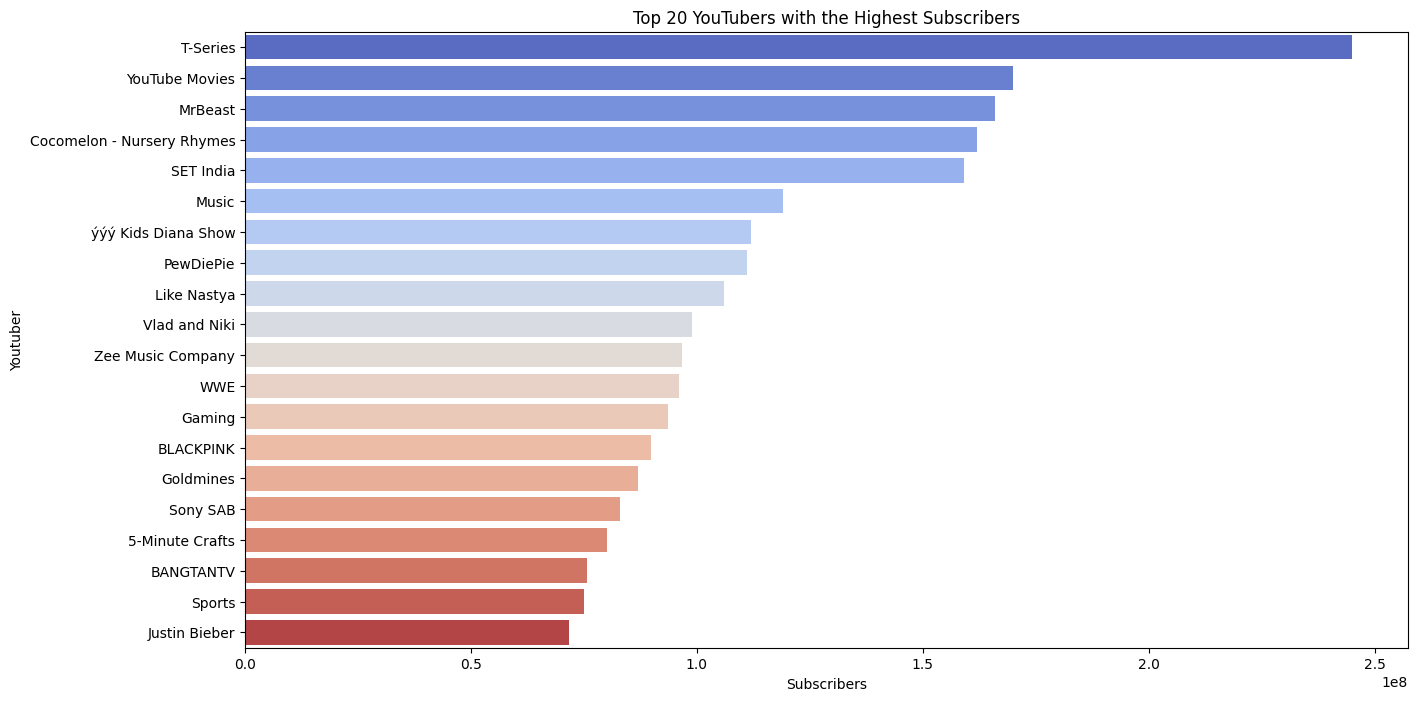

,Youtuber,subscribers
0,T-Series,245000000
1,YouTube Movies,170000000
2,MrBeast,166000000
3,Cocomelon - Nursery Rhymes,162000000
4,SET India,159000000
5,Music,119000000
6,ýýý Kids Diana Show,112000000
7,PewDiePie,111000000
8,Like Nastya,106000000
9,Vlad and Niki,98900000


In [ ]:
# Sorting the data by 'subscribers' to get the top 20 YouTubers with the highest views
top_views = data_df.nlargest(20, 'subscribers')

# Plotting the bar chart for the top 20 YouTubers with the highest video views
plt.figure(figsize=(15, 8))
sns.barplot(x='subscribers', y='Youtuber', data=top_views, palette='coolwarm')
plt.title('Top 20 YouTubers with the Highest Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Youtuber')
plt.show()

# Viewing top 20 video views
top_20_views = top_views[['Youtuber', 'subscribers']]
top_20_views

We can see that the highest YouTuber with the highest subscribers or highest video views does not necessarily mean that they have the higher earnings. For example, YouTuber: "T-Series" has the highest subscriber count of 245,000,000 and video views of 2.280000e+11 but is not on the one with the highest yearly earnings.

### Data Pre-processing

In [ ]:
# To remove some Youtube default channel's data.
# These data render the video views to be 0.
data_df = data_df[data_df['video views'] > 0]
data_df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2.000000e+06,2006.0,Mar,13.0,28.1,1.366418e+09,471031528.0,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8.000000e+06,2012.0,Feb,20.0,88.2,3.282395e+08,270663028.0,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1.000000e+06,2006.0,Sep,1.0,88.2,3.282395e+08,270663028.0,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1.000000e+06,2006.0,Sep,20.0,28.1,1.366418e+09,471031528.0,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,3.490791e+05,2015.0,May,12.0,88.2,3.282395e+08,270663028.0,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,7.000000e+05,2017.0,Feb,12.0,51.3,2.125594e+08,183241641.0,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,3.000000e+05,2018.0,Sep,14.0,28.1,1.366418e+09,471031528.0,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,Others,HybridPanda,2452,United Kingdom,GB,Games,...,1.000000e+03,2006.0,Sep,11.0,60.0,6.683440e+07,55908316.0,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,1.000000e+05,2012.0,May,9.0,67.0,1.028545e+07,9021165.0,9021165.0,60.128161,18.643501


In [ ]:
data_df = data_df.copy()
data_df.drop(columns=['Abbreviation','country_rank','Unemployment rate','Urban_population','Gross tertiary education enrollment (%)','Title','Latitude','Longitude','created_year','created_date','created_month','Population', 'subscribers_for_last_30_days'],inplace=True)
# df_dropped.drop(columns=['Abbreviation', 'Unemployment rate', 'channel_type','Country','Urban_population','Gross tertiary education enrollment (%)','Title','Latitude','Longitude','created_date','created_month','Population', 'subscribers_for_last_30_days'],inplace=True)

data_df


,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
0,1,T-Series,245000000,2.280000e+11,Music,20082,India,Music,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,Entertainment,48.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,Education,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0
4,5,SET India,159000000,1.480000e+11,Shows,116536,India,Entertainment,3.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,1111,United States,Entertainment,5.0,3.0,7.316740e+08,182900.0,2900000.0,2200000.0,35100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,1200,Brazil,Entertainment,525.0,172.0,5.525130e+08,138100.0,2200000.0,1700000.0,26500000.0
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,India,Games,6141.0,69.0,6.473500e+07,16200.0,258900.0,194200.0,3100000.0
992,993,Panda,12300000,2.214684e+09,Others,2452,United Kingdom,Games,129005.0,1202.0,6.703500e+04,17.0,268.0,201.0,3200.0
993,994,RobTopGames,12300000,3.741235e+08,Gaming,39,Sweden,Games,35112.0,69.0,3.871000e+06,968.0,15500.0,11600.0,185800.0


We dropped those columns as these columns likely not contribute to the earnings factor. For instance, it might be possible that, in different country, YouTube might pay differently to their content creators.

In an illustrated example, arbitarily, in HK, YouTube might pay their creators USD7 per 1000 views, but may only pay their creators in Vietnam, say, USD5 per 1000 views. However, we do not have the data in this dataset. Hence, these columns are unnecessary noises.

In [ ]:
#a numerical df
from sklearn.preprocessing import LabelEncoder

# data_df = pd.read_csv('Global_YouTube_Statistics.csv', encoding='ISO-8859-1')

# Create a label encoder object, only need to encode channel_type and category
le_category = LabelEncoder()
le_channel_type = LabelEncoder()
le_country = LabelEncoder()

# Replace 'category' and 'channel_type' with their encoded labels
data_df['category'] = le_category.fit_transform(data_df['category'].astype(str))
data_df['channel_type'] = le_channel_type.fit_transform(data_df['channel_type'].astype(str))
data_df['Country'] = le_country.fit_transform(data_df['Country'].astype(str))

# Retrieve and store the mappings
category_mapping = {index: label for index, label in enumerate(le_category.classes_)}
channel_type_mapping = {index: label for index, label in enumerate(le_channel_type.classes_)}
country_mapping = {index: label for index, label in enumerate(le_country.classes_)}

# Pring mappings
print("Category Mapping:", category_mapping)
print("Channel Type Mapping:", channel_type_mapping)
print("Country Mapping: ", country_mapping)

data_df

# To decode:
# df['category'] = le_category.inverse_transform(df['category'])
# df['channel_type'] = le_channel_type.inverse_transform(df['channel_type'])

# # Loop over the categorical columns, only change Country, category and channel_type
# for col in df.select_dtypes(include=['object']).columns:
#     # Transform the categorical column with LabelEncoder
#     df[col] = le.fit_transform(df[col])

# # Now 'df' contains numerical values instead of categorical
# print(df.head())

Category Mapping: {0: 'Autos & Vehicles', 1: 'Comedy', 2: 'Education', 3: 'Entertainment', 4: 'Film & Animation', 5: 'Gaming', 6: 'Howto & Style', 7: 'Movies', 8: 'Music', 9: 'News & Politics', 10: 'Nonprofits & Activism', 11: 'Others', 12: 'People & Blogs', 13: 'Pets & Animals', 14: 'Science & Technology', 15: 'Shows', 16: 'Sports', 17: 'Trailers', 18: 'Travel & Events'}
Channel Type Mapping: {0: 'Animals', 1: 'Autos', 2: 'Comedy', 3: 'Education', 4: 'Entertainment', 5: 'Film', 6: 'Games', 7: 'Howto', 8: 'Music', 9: 'News', 10: 'Nonprofit', 11: 'Others', 12: 'People', 13: 'Sports', 14: 'Tech'}
Country Mapping:  {0: 'Afghanistan', 1: 'Andorra', 2: 'Argentina', 3: 'Australia', 4: 'Bangladesh', 5: 'Barbados', 6: 'Brazil', 7: 'Canada', 8: 'Chile', 9: 'China', 10: 'Colombia', 11: 'Cuba', 12: 'Ecuador', 13: 'Egypt', 14: 'El Salvador', 15: 'Finland', 16: 'France', 17: 'Germany', 18: 'India', 19: 'Indonesia', 20: 'Iraq', 21: 'Italy', 22: 'Japan', 23: 'Jordan', 24: 'Kuwait', 25: 'Latvia', 26: 

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
0,1,T-Series,245000000,2.280000e+11,8,20082,18,8,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0
2,3,MrBeast,166000000,2.836884e+10,3,741,47,4,48.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,2,966,47,3,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0
4,5,SET India,159000000,1.480000e+11,15,116536,18,4,3.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,12,1111,47,4,5.0,3.0,7.316740e+08,182900.0,2900000.0,2200000.0,35100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,16,1200,6,4,525.0,172.0,5.525130e+08,138100.0,2200000.0,1700000.0,26500000.0
991,992,Free Fire India Official,12300000,1.674410e+09,12,1500,18,6,6141.0,69.0,6.473500e+07,16200.0,258900.0,194200.0,3100000.0
992,993,Panda,12300000,2.214684e+09,11,2452,46,6,129005.0,1202.0,6.703500e+04,17.0,268.0,201.0,3200.0
993,994,RobTopGames,12300000,3.741235e+08,5,39,40,6,35112.0,69.0,3.871000e+06,968.0,15500.0,11600.0,185800.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming that 'df' is your DataFrame
# Create a StandardScaler object
scaler = StandardScaler()
data_df = data_df.drop(['Youtuber'], axis=1)

# Fit the scaler to the data and transform it
df_standardized = pd.DataFrame(scaler.fit_transform(data_df), columns=data_df.columns)

# Now 'df_standardized' is a standardized version of 'df'
print(df_standardized.head())


       rank  subscribers  video views  category   uploads   Country  \
0 -1.746207    13.537491    15.353057  0.388694  0.315812 -0.915284   
1 -1.739219     8.728736     1.220468 -0.878284 -0.248688  1.056727   
2 -1.735725     8.485255    10.822273 -1.131679 -0.242121  1.056727   
3 -1.732231     8.302644     9.689577  2.162462  3.130986 -0.915284   
4 -1.725242     5.441739     5.813423  1.402276 -0.237889  1.056727   

   channel_type  video_views_rank  channel_type_rank  \
0      0.474221         -0.395454          -0.385280   
1     -0.802876         -0.395418          -0.385280   
2     -1.122151         -0.395453          -0.385280   
3     -0.802876         -0.395452          -0.384752   
4     -0.802876         -0.395451          -0.384225   

   video_views_for_the_last_30_days  lowest_monthly_earnings  \
0                          5.130313                 7.321549   
1                          2.887802                 4.162016   
2                          4.432916         

# **PCA**

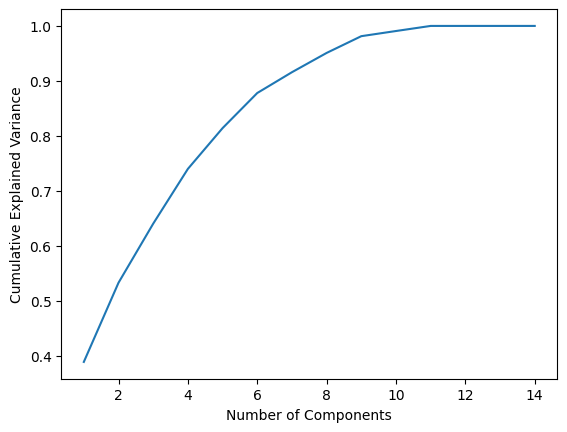

explained variance:
[3.88461966e-01 1.44114677e-01 1.07486947e-01 9.97198879e-02
 7.41828455e-02 6.39127489e-02 3.78754576e-02 3.50874740e-02
 3.04994998e-02 9.39052219e-03 9.25654714e-03 8.18350914e-06
 3.13387356e-06 1.09407876e-07]

cumulative explained variance:
[0.3884619656186019, 0.5325766427573286, 0.6400635901219707, 0.7397834780205794, 0.813966323497836, 0.8778790724447582, 0.9157545300539917, 0.9508420040704774, 0.9813415038797207, 0.9907320260730799, 0.9999885732094184, 0.99999675671856, 0.9999998905921242, 1.0000000000000002]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming that 'df_standardized' is your DataFrame
# Create a PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(df_standardized)

# Get the explained variance ratio of each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('explained variance:')
print(explained_variance_ratio)
print('\ncumulative explained variance:')
print(cumulative_explained_variance.tolist())


Based on PCA plot, we think that the first 8 components is sufficient as it explains over 95% of the variations within the data.

In [ ]:
# Transform the data into the first n principal components
n = 8  # replace with the number of components
pca = PCA(n_components=n)
df_pca = pca.fit_transform(df_standardized)

In [ ]:
# Print out the PCA components
for i, component in enumerate(pca.components_):
    print(f"Principal component {i+1}:")
    for weight, feature in zip(component, df_standardized.columns):
        print(f"{feature}: {weight}")
    print("\n")

Principal component 1:
rank: -0.17832786287416372
subscribers: 0.264581878402124
video views: 0.3033475639041088
category: 0.017790165968968957
uploads: 0.09237457077714488
Country: -0.008939954323976056
channel_type: -0.04104113632550028
video_views_rank: -0.10536489190700224
channel_type_rank: -0.1033112877149063
video_views_for_the_last_30_days: 0.30692653217171106
lowest_monthly_earnings: 0.4121865072813081
highest_monthly_earnings: 0.41211859096505166
lowest_yearly_earnings: 0.4122465661288045
highest_yearly_earnings: 0.4121849700997108


Principal component 2:
rank: -0.2697128271744491
subscribers: 0.2847201955562902
video views: 0.21918493649961757
category: 0.1440226495450676
uploads: -0.043639146248660735
Country: -0.030466369004326872
channel_type: 0.3045046644837257
video_views_rank: 0.5906764718219618
channel_type_rank: 0.5723497041042198
video_views_for_the_last_30_days: 0.01425817443477162
lowest_monthly_earnings: -0.03590657263558826
highest_monthly_earnings: -0.03606789

# **Linear Regression**

# 1. Linear Regression on Standardized Data

In [ ]:
from sklearn.linear_model import LinearRegression

# df_standardized has more than one column
if len(df_standardized.columns) > 1:
    for col in df_standardized.columns:
        # Define the predictor variables (all columns except the current one)
        X = df_standardized.loc[:, df_standardized.columns != col]

        # Define the target variable (the current column)
        y = df_standardized[col]

        # Create a Linear Regression model
        model = LinearRegression()

        # Fit the model
        model.fit(X, y)

        # Print the coefficient of determination R^2 of the prediction
        print(f'R^2 for {col}: {model.score(X, y)}')
else:
    print("The DataFrame must have more than one column for this operation.")



R^2 for rank: 0.44375009929604825
R^2 for subscribers: 0.775841269745953
R^2 for video views: 0.7448850747180846
R^2 for category: 0.2849457785216024
R^2 for uploads: 0.06385239965290146
R^2 for Country: 0.027494216995940346
R^2 for channel_type: 0.3194560270060407
R^2 for video_views_rank: 0.7628596512965525
R^2 for channel_type_rank: 0.7468216118700661
R^2 for video_views_for_the_last_30_days: 0.4799657509677011
R^2 for lowest_monthly_earnings: 0.999997093172553
R^2 for highest_monthly_earnings: 0.9999128745221368
R^2 for lowest_yearly_earnings: 0.9998887930585888
R^2 for highest_yearly_earnings: 0.9999968740099116


In [ ]:
from sklearn.linear_model import LinearRegression

# Define the predictor variables (all columns except 'highest_yearly_earnings')
X = df_standardized.loc[:, df_standardized.columns != 'highest_yearly_earnings']

# Define the target variable ('highest_yearly_earnings')
y = df_standardized['highest_yearly_earnings']

# Create a Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficient of determination R^2 of the prediction
print(f'R^2 for highest_yearly_earnings: {model.score(X, y)}')


R^2 for highest_yearly_earnings: 0.9999968740099116


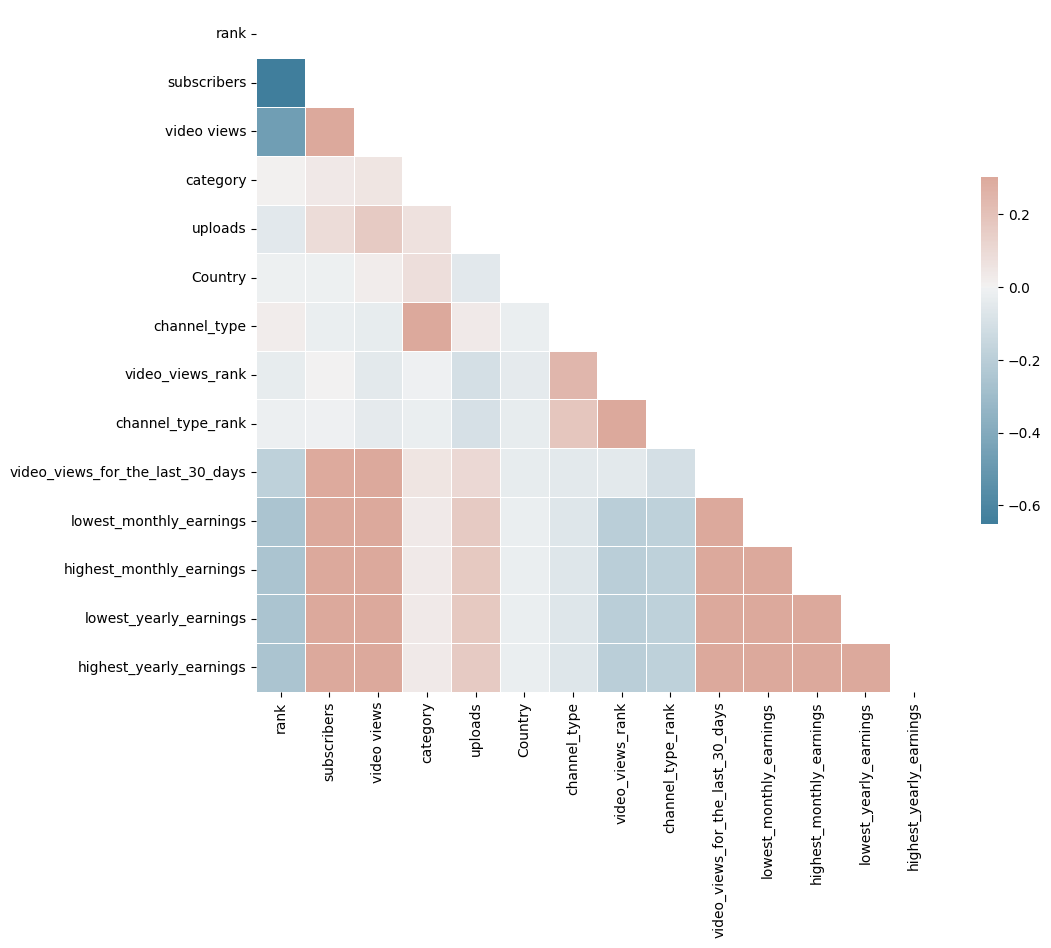

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming that 'df_standardized' is your DataFrame
# Compute the correlation matrix for all columns
corr = df_standardized.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# 2. Linear Regression on PCA-reduced Data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'highest_yearly_earnings' as target variable.
y = data_df['highest_yearly_earnings']
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data again with the scaled target
X_train, X_test, y_train, y_test = train_test_split(df_pca, y_scaled, test_size=0.2, random_state=42)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Mean Squared Error: 0.07561938207459969
R2 Score: 0.8971188787844195


# 3. Compare performance of Linear Regression on Standardized vs PCA

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'highest_yearly_earnings' as target variable.
y = data_df['highest_yearly_earnings']
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data again with the scaled target
X_train, X_test, y_train, y_test = train_test_split(df_standardized, y_scaled, test_size=0.2, random_state=42)


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 2.151286393363632e-31
R2 Score: 1.0


##### The Linear Regression on PCA data has a MSE = 0.07561938207459969, which is of a relatively low MSE, indicating that, on average, the squared difference between the predicted and actual values is rather small. R^2 = 0.8971188787844195 (~89.71%), this suggests that the model could explain over 89% of the variances of the target variable, "highest_yearly_earnings".

On the other hand, the Linear Regression on standardized data has a MSE = 2.151286393363632e-31, this suggests that there are almost no difference between the predicted and actual values. R^2 = 1 (100%), this suggests that the model explains 100% of hte variance in the target variable, "highest_yearly_earnings". However, this would possibly mean that there are some overfitting with the models.

# **Clustering**

# 1. Conduct K Means Clustering and GMM using Standardized Dataset

# 1.1. K Means Clustering with standardized dataset
n = 5 after elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       rank  subscribers  video views  category   uploads   Country  \
0 -1.746207    13.537491    15.353057  0.388694  0.315812 -0.915284   
1 -1.739219     8.728736     1.220468 -0.878284 -0.248688  1.056727   
2 -1.735725     8.485255    10.822273 -1.131679 -0.242121  1.056727   
3 -1.732231     8.302644     9.689577  2.162462  3.130986 -0.915284   
4 -1.725242     5.441739     5.813423  1.402276 -0.237889  1.056727   

   channel_type  video_views_rank  channel_type_rank  \
0      0.474221         -0.395454          -0.385280   
1     -0.802876         -0.395418          -0.385280   
2     -1.122151         -0.395453          -0.385280   
3     -0.802876         -0.395452          -0.384752   
4     -0.802876         -0.395451          -0.384225   

   video_views_for_the_last_30_days  lowest_monthly_earnings  \
0                          5.130313                 7.321549   
1                          2.887802                 4.162016   
2                          4.432916         

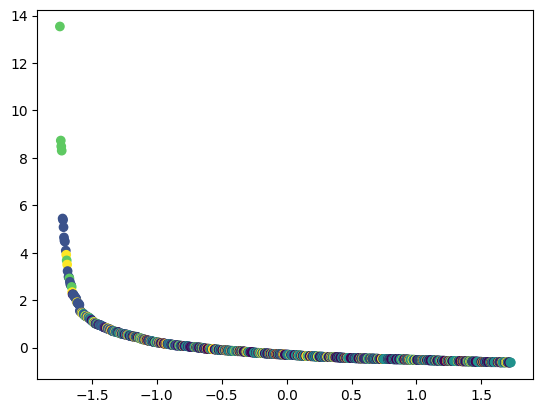

In [ ]:
from sklearn.cluster import KMeans

# Assuming that 'df_standardized' is your DataFrame
# Create a KMeans object
kmeans = KMeans(n_clusters=5)  # chosen based on elbow method

# Fit the KMeans object to the data
kmeans.fit(df_standardized)

# Get the cluster assignments
clusters = kmeans.labels_

# Add the cluster assignments to the DataFrame
df_standardized['cluster'] = clusters

# Now 'df_standardized' is your DataFrame with an additional 'cluster' column that indicates the cluster assignment of each row
print(df_standardized.head())

# To visualize the clusters (only works if your data has 2 or 3 dimensions)
plt.scatter(df_standardized.iloc[:, 0], df_standardized.iloc[:, 1], c=clusters)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5593887163760628


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.40213702029943443


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.2740466816728504


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.2940832775297547


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3100142666710341


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.31320987791622623


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.2549316207713775
For n_clusters = 9 The average silhouette_score is : 0.2592633657911349


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


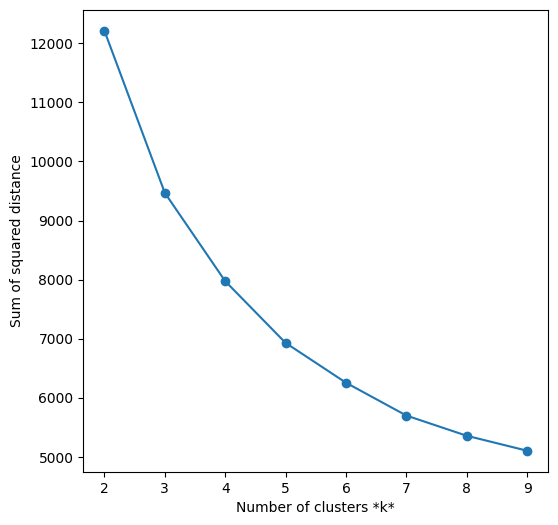

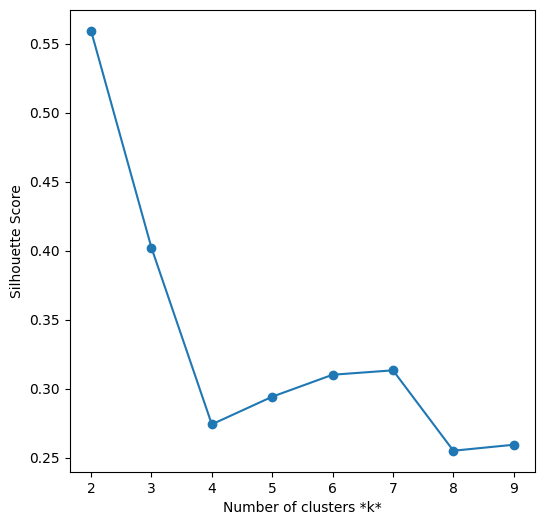

In [ ]:
#elbow method
from sklearn.metrics import silhouette_score

# Assuming that 'df_standardized' is your DataFrame
sse = []
silhouette_scores = []
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_standardized)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(df_standardized, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the sum of squared distances from each point to its cluster center
    sse.append(clusterer.inertia_)

# Plot sse against number of clusters
plt.figure(figsize=(6, 6))
plt.plot(range_n_clusters, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

# Plot silhouette_score against number of clusters
plt.figure(figsize=(6, 6))
plt.plot(range_n_clusters, silhouette_scores, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette Score');

# 1.2. GMM
n=5 after running elbow method

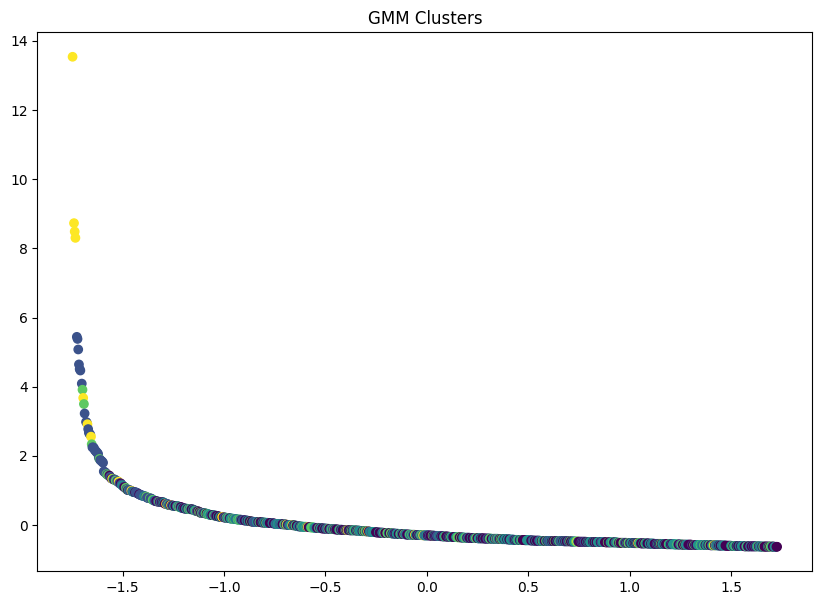

In [ ]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt

# Create a GaussianMixture object
gmm = GaussianMixture(n_components=5)

# Fit the GMM model to the data
gmm.fit(df_standardized)

# Predict the cluster labels
labels = gmm.predict(df_standardized)

# Add the labels to the DataFrame
df_standardized['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10,7))
plt.scatter(df_standardized.iloc[:, 0], df_standardized.iloc[:, 1], c=labels, cmap='viridis')
plt.title('GMM Clusters')
plt.show()


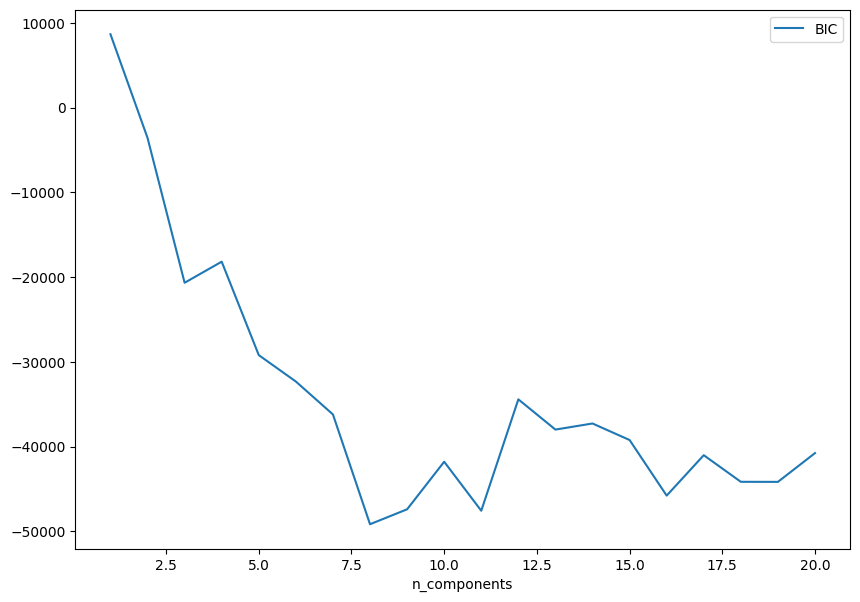

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Define the range of components to try
n_components = np.arange(1, 21)

# Create an empty list to store the BIC values
bic = []

# Loop over the number of components
for i in n_components:
    # Create a GaussianMixture object
    gmm = GaussianMixture(n_components=i)

    # Fit the GMM model to the data
    gmm.fit(df_standardized)

    # Append the BIC value to the list
    bic.append(gmm.bic(df_standardized))

# Plot the BIC values
plt.figure(figsize=(10,7))
plt.plot(n_components, bic, label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()


Based on visualisation results, both K means and GMM clusters seem inseparable, and the reaons could be that there are significant outliers (as seen from whisker and box plots), or that there could be inherent linearity in that data such that it does not fit in spherical clusters. We shall proceed with other clustering methods on PCA-reduced components, which can help reduce the noise of the data.

# 2. K-means and GMM clustering on PCA components

# 2.1. K Means on PCA reduced dataset

choose n = 4 based on elbow method, while doing k means clustering on PCA_dataframe

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


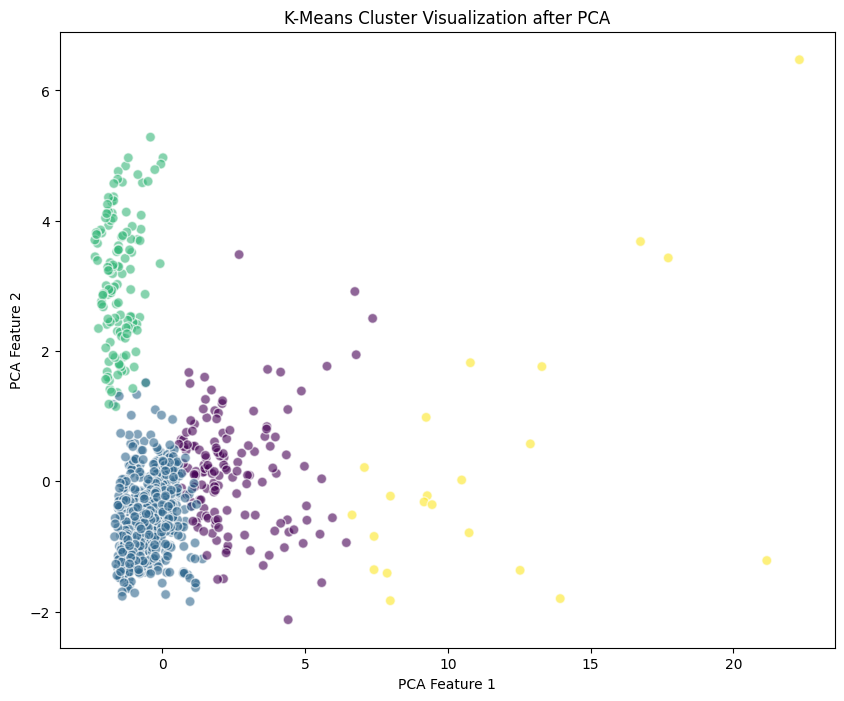

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# use 10 components
# First, apply PCA to reduce the dataset to 2 principal components for visualization
# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(df_standardized)

# Perform K-Means clustering on the PCA-reduced data
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=10)
clusters_pca = kmeans_pca.fit_predict(df_pca)

# Now, create the improved scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_pca, cmap='viridis', alpha=0.6, edgecolors='w', s=50)
plt.title('K-Means Cluster Visualization after PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

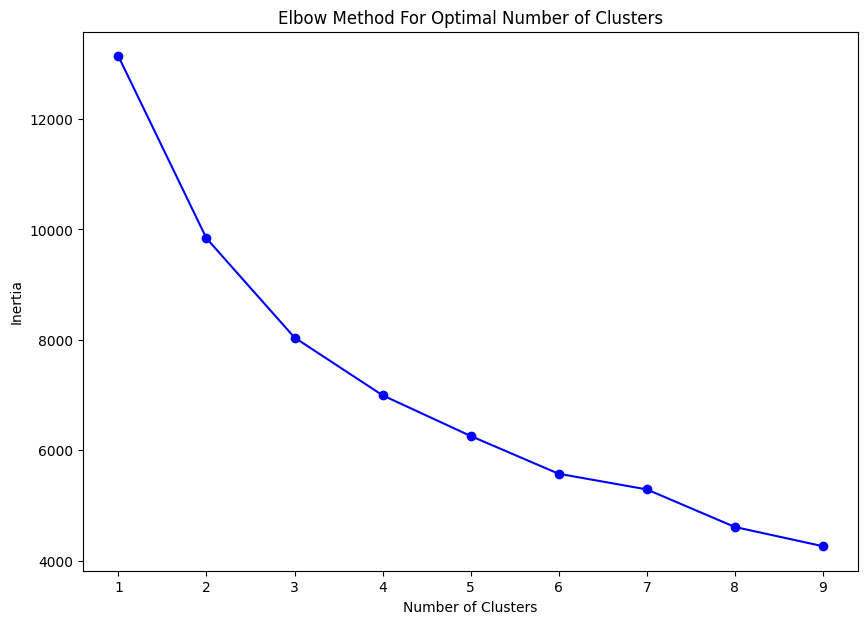

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of clusters to try
n_clusters = range(1, 10)

# Create an empty list to store the inertia values
inertia = []

# Loop over the number of clusters
for n in n_clusters:
    # Create a KMeans object
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=10)

    # Fit the KMeans model to the data
    kmeans.fit(df_pca)

    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10,7))
plt.plot(n_clusters, inertia, 'bo-')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


# 2.2. GMM on PCA-reduced data
n = 4 after doing BIC/AIC

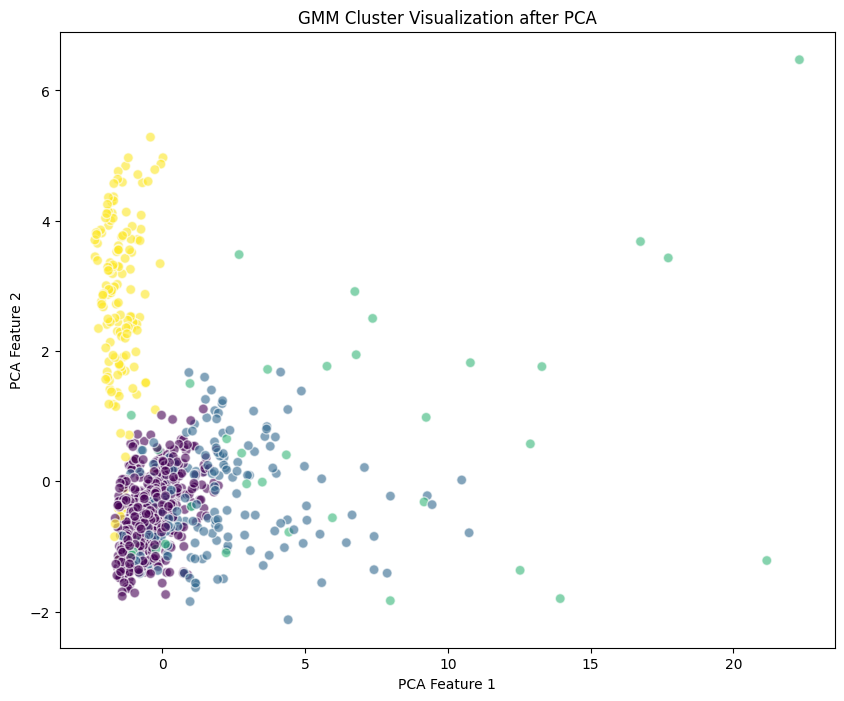

In [ ]:
from sklearn.mixture import GaussianMixture

# Create a GaussianMixture object
gmm = GaussianMixture(n_components=4)

# Fit the GMM model to the PCA-reduced data
gmm.fit(df_pca)

# Predict the cluster labels
labels = gmm.predict(df_pca)

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='w', s=50)
plt.title('GMM Cluster Visualization after PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()


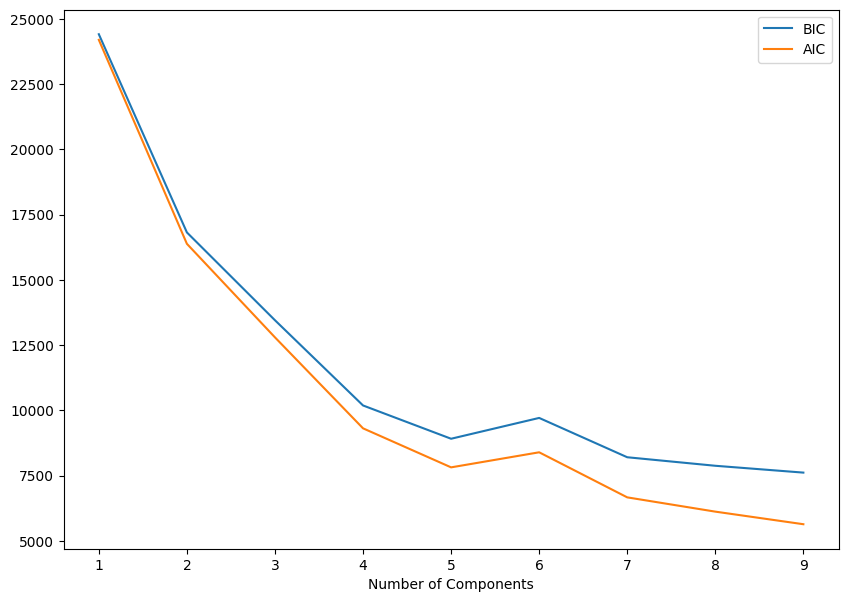

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Define the range of components to try
n_components = range(1, 10)

# Create empty lists to store the BIC and AIC values
bic = []
aic = []

# Loop over the number of components
for n in n_components:
    # Create a GaussianMixture object
    gmm = GaussianMixture(n_components=n)

    # Fit the GMM model to the PCA-reduced data
    gmm.fit(df_pca)

    # Append the BIC and AIC values to the lists
    bic.append(gmm.bic(df_pca))
    aic.append(gmm.aic(df_pca))

# Plot the BIC and AIC values
plt.figure(figsize=(10,7))
plt.plot(n_components, bic, label='BIC')
plt.plot(n_components, aic, label='AIC')
plt.legend(loc='best')
plt.xlabel('Number of Components')
plt.show()


# 2.3. Use Silhouette Score to determine model performance between K Means and GMM of PCA reduced data

In [ ]:
from sklearn.metrics import silhouette_score

# K-means
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=10)
kmeans_clusters = kmeans.fit_predict(df_pca)
kmeans_silhouette = silhouette_score(df_pca, kmeans_clusters)
print('K-means Silhouette Score:', kmeans_silhouette)

# GMM
gmm = GaussianMixture(n_components=4)
gmm.fit(df_pca)
gmm_clusters = gmm.predict(df_pca)
gmm_silhouette = silhouette_score(df_pca, gmm_clusters)
print('GMM Silhouette Score:', gmm_silhouette)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Silhouette Score: 0.33700275276894204
GMM Silhouette Score: 0.2692380645542037


# 2.4 Result

The K-means clustering has a silhouette score of 0.337, and the Gaussian Mixture Model (GMM) has a silhouette score of 0.2692. This means that, on average, the data points in the K-means clusters are slightly more similar to each other than they are to data points in other clusters compared to the GMM. However, both scores are relatively low, indicating that there might be some overlap between the clusters, and the data points might not be clearly separable.

# **Natural Language Processing**

In [ ]:
# Install pandas
!pip install pandas

# Install NLTK
!pip install nltk

# Once you've installed NLTK, you need to download the specific NLTK packages.
# Here's how you can download the stopwords and punkt packages:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Extract the titles
nlp_df = pd.read_csv('Global_YouTube_Statistics.csv', encoding='ISO-8859-1')
titles = nlp_df['Title'].values.tolist()

stop_words = set(stopwords.words('english'))

cleaned_titles = []
for title in titles:
    # convert to lowercase
    title = title.lower()
    # tokenize the title
    word_tokens = word_tokenize(title)
    # remove stopwords
    filtered_title = [word for word in word_tokens if word not in stop_words]
    cleaned_titles.append(filtered_title)

print(cleaned_titles)

[['t-series'], ['youtubemovies'], ['mrbeast'], ['cocomelon', '-', 'nursery', 'rhymes'], ['set', 'india'], ['music'], ['ýýý', 'kids', 'diana', 'show'], ['pewdiepie'], ['like', 'nastya', 'vlog'], ['vlad', 'niki'], ['zee', 'music', 'company'], ['wwe'], ['gaming'], ['blackpink'], ['goldmines'], ['sony', 'sab'], ['5-minute', 'crafts', '2.0'], ['bangtantv'], ['sports'], ['justin', 'bieber'], ['hybe', 'labels'], ['zee', 'tv'], ['pinkfong', 'baby', 'shark', '-', 'kids', "'", 'songs', '&', 'stories'], ['canal', 'kondzilla'], ['chuchu', 'tv', 'nursery', 'rhymes', '&', 'kids', 'songs'], ['shemaroo', 'filmi', 'gaane'], ['colors', 'tv'], ['t-', 'series', 'bhakti', 'sagar'], ['dude', 'perfect'], ['movieclips'], ['tips', 'official'], ['el', 'reino', 'infantil'], ['wave', 'music'], ['aaj', 'tak'], ['sony', 'music', 'india'], ['eminemmusic'], ['marshmello'], ['yrf'], ['looloo', 'kids', '-', 'nursery', 'rhymes', 'children', "'s", 'ï¿½'], ['ed', 'sheeran'], ['infobells', '-', 'hindi'], ['taylor', 'swift'

In [ ]:
tokenized_data = []
for item in cleaned_titles:
    # Tokenize the title
    tokens = word_tokenize(item[0])  # item is a list, so we take the first element
    tokenized_data.append(tokens)

print(tokenized_data)

[['t-series'], ['youtubemovies'], ['mrbeast'], ['cocomelon'], ['set'], ['music'], ['ýýý'], ['pewdiepie'], ['like'], ['vlad'], ['zee'], ['wwe'], ['gaming'], ['blackpink'], ['goldmines'], ['sony'], ['5-minute'], ['bangtantv'], ['sports'], ['justin'], ['hybe'], ['zee'], ['pinkfong'], ['canal'], ['chuchu'], ['shemaroo'], ['colors'], ['t-'], ['dude'], ['movieclips'], ['tips'], ['el'], ['wave'], ['aaj'], ['sony'], ['eminemmusic'], ['marshmello'], ['yrf'], ['looloo'], ['ed'], ['infobells'], ['taylor'], ['ariana'], ['billionsurprisetoys'], ['juegagerman'], ['billie'], ['get'], ['shemaroo'], ['badabun'], ['sonymusicindiavevo'], ['aefour'], ['badbunny'], ['fernanfloo'], ['voot'], ['felipe'], ['vocï¿½ï¿½ï¿½'], ['har'], ['brightside'], ['katy'], ['whinderssonnunes'], ['abs-cbn'], ['alanwalker'], ['holasoygerman'], ['shakira'], ['ýýýýýýýý'], ['ary'], ['speed'], ['masha'], ['like'], ['rihanna'], ['ishtar'], ['kimberly'], ['little'], ['luis'], ['elrubiusomg'], ['toys'], ['shfa2'], ['luccas'], ['carry

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Join the tokens back into a single string
documents = [' '.join(tokens) for tokens in tokenized_data]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Now X is a matrix where each row represents a document and each column represents a token in the vocabulary


In [ ]:
from gensim import corpora
from gensim.models import LdaModel

# Create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(tokenized_data)

# Create a corpus from the dictionary
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

# Train the LDA model
lda = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=2)

# Print the topics
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.012*"smile" + 0.010*"babybus" + 0.009*"t-series" + 0.006*"laughs" + 0.006*"mymissanand"')
(1, '0.015*"masha" + 0.012*"beast" + 0.012*"david" + 0.009*"aditya" + 0.009*"desi"')
(2, '0.038*"ýýýýýýýý" + 0.028*"little" + 0.023*"sony" + 0.023*"kids" + 0.013*"peppa"')
(3, '0.025*"troom" + 0.015*"wave" + 0.012*"ýýý" + 0.012*"wolfoo" + 0.012*"camila"')
(4, '0.017*"el" + 0.012*"heidi" + 0.012*"srk" + 0.012*"blippi" + 0.009*"sonotek"')
(5, '0.022*"super" + 0.022*"5-minute" + 0.014*"t-series" + 0.014*"ýýýýýýýýýýýýýýý" + 0.014*"gma"')
(6, '0.037*"goldmines" + 0.018*"shemaroo" + 0.009*"jake" + 0.006*"therichest" + 0.006*"renato"')
(7, '0.043*"vlad" + 0.022*"canal" + 0.017*"ultra" + 0.017*"ýýýýýýýýýýýý" + 0.006*"."')
(8, '0.033*"zee" + 0.017*"diana" + 0.011*"ninja" + 0.009*"mr" + 0.008*"alan"')
(9, '0.045*"like" + 0.026*"infobells" + 0.015*"bbc" + 0.010*"vijay" + 0.005*"blossom"')


# Results


1. Theme of Positive and Family-oriented Content: Words like "like," "smile," "family," and "panda" appear frequently in the analyzed titles. This suggests that there is a significant amount of content on YouTube that focuses on positive and family-oriented themes.

2. Popular Channels and Platforms: Terms such as "5-minute," "t-series," "shemaroo," and "netflix" are prominent in the titles. This indicates that these channels and platforms are likely popular and have a strong presence on YouTube.

3. Variety of Topics: The analyzed titles cover a wide range of topics. For instance, there are references to channels related to news ("ndtv," "bbc," "gma"), entertainment ("goldmines," "masha," "super"), and children's content ("infobells," "babybus," "troom"). This suggests that YouTube offers diverse content catering to different interests and age groups.

4. Influencers and Personalities: Some titles mention names like "vlad," "diana," "ryan," and "preston," which are likely associated with popular influencers or personalities on YouTube. This indicates that content featuring specific individuals plays a role in attracting viewership.

5. Regional and Language-specific Channels: Certain titles mention specific channels or terms that indicate a regional focus, such as "sonotek," "khandeshi," "abs-cbn," and "telemundo." This suggests that YouTube hosts content catering to different languages and regions.

Overall, the analysis of YouTube titles reveals a diverse landscape of content on the platform, ranging from positive and family-oriented themes to popular channels, influencers, and a variety of topics and languages.

## Limitation and Recommendations

The result generated will differ slightly due to nature of AI model. To make results more consistent, we would recommend running the model multiple times and draw insights. Having a larger dataset would also help. In the future, NLP on youtube comments can also potentially draw insights on subscribers' sentiments.

## Findings and Conclusion

Assumption: The dataset collected is all on the top YouTube creators. By finding trends and correlations, we can understand what factors constitute a successful channel.

1. Genre: Entertainment, Music, People & Blogs are the most popular genre of videos -> Recommendation: create more videos of these genres.
2. Supporters: Positive correlation between subscribers and views, and earnings of videos -> Recommendation: build loyal fanbase/ subscriber base.
3. Content: Based on NLP on Youtube titles, it seems popular videos have a common theme of positive content, internet personalities targetting international audiences -> Recommendation: have a strong persona/ influencer image, and create positive content.

However, those abovementioned are only based on our observations. It does not mean that one could create a successful YouTube channel based on those abovementioned. This is because, in this dataset, there are still many unknowns. For example, we would have intuitively known that YouTube would pay content creators in different countries different rates (eg, in HK, YouTube might pay their creators USD7 per 1000 views, but may only pay their creators in Vietnam, say, USD5 per 1000 views.)

Without concrete data, it is hard to determine the success of a YouTube channel. Also, we need more data on a few domains. For instance, we don't know when a YouTube channel was or had been successful. We merely know the highest_yearly_earnings, and that isn't enough data. We would require actual earnings, and that will be helpful for us to perform data analysis.


In addition, with the dataset, we realized the following pointers:
 1. We do not have concrete earnings data from each YouTuber. We only merely have their highest/lowest earnings. We couldn't simply just take the average and determine that it was their estimated earnings.
 2. There might be some YouTubers who are already established in the content creation business and have loyal viewers/subscribers. Hence, out of the top 995 YouTubers in the datasets, 337 subscribers_for_last_30_days are empty. This might suggest that there might be some issues in the data collection or they have merely had 0 new subscribers in the last 30 days.
 3. Sometimes, some successes of the channels could likely be attributed to the general environment. Take the famous Gangnam Style trend that became famous in 2012, and it took the Gangnam Style's MV to be one of the hottest in the world.

Henceforth, from our analysis, we conclude that there are no "definite" steps to a successful YouTube channel. In other words, we have yet to have a concrete conclusion to our hypothesis.


Nonetheless, through this project, we have understood that data analysis in the e-commerce world is always challenging. There might be lots of noisy data, inadequate data collection process, or even lack of data. There might even be much noise that can cause variables to be correlated to each other. The end goal is often ambiguous, which is one key takeaway from this project.